In [1]:
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix


In [2]:
from sklearn.model_selection import train_test_split


数据预处理：  
-了解样本正负分布
-缺失值，连续值等补全

In [3]:
data = pd.read_csv('/home/wph/course/data_science/Project1_Classification/train.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.006129,-0.029258,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,1
1,-0.204090,-0.127860,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,1
2,0.044329,0.024797,-0.954,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,1
3,0.239970,0.253780,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9879,-1.0,1
4,0.142860,0.304780,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,1


In [4]:
dataset = data[list(range(9))].values
labels = data[10].values

(array([6103.,  377.]), array([-1.,  0.,  1.]), <a list of 2 Patch objects>)

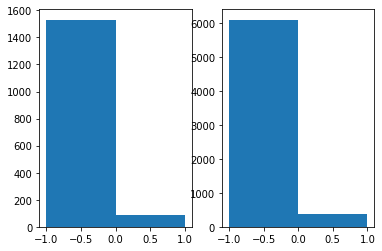

In [5]:
# 分割数据集，并且两个数据集里面正负样本的分布是否一致
X_trian, X_val, Y_train, Y_val = train_test_split(dataset, labels, test_size=0.2, shuffle=True)
plt.subplot(121)
plt.hist(Y_val, bins=2)
plt.subplot(122)
plt.hist(Y_train, bins=2 )

## 分类的标准  
![avatar](img/entropy.png)
![avatar](img/gini.png)  
## 评价标准：混淆矩阵
![avatar](img/confusion.png)

Confusion matrix:
[[1455   76]
 [  78   11]]
              precision    recall  f1-score   support

          -1    0.94912   0.95036   0.94974      1531
           1    0.12644   0.12360   0.12500        89

    accuracy                        0.90494      1620
   macro avg    0.53778   0.53698   0.53737      1620
weighted avg    0.90392   0.90494   0.90443      1620

auc:0.5315392010802957


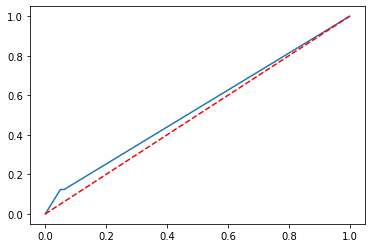

In [6]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_trian, Y_train)

y_pred = dt_clf.predict(X_val)
# 评价标准
print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred, digits=5))

# auc
y_probas = dt_clf.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

print('auc:{}'.format(auc(fpr, tpr)))

In [ ]:
决策树的可视化
import graphviz
from sklearn.tree import export_graphviz

feature_name=['feature{}'.format(i) for i in range(9)]

dot_data = export_graphviz(dt_clf, feature_names=feature_name, class_names=['negative', 'positive'])

graph=graphviz.Source(dot_data)
graph

In [14]:
# 特征的重要性
dt_clf.feature_importances_

array([0.3676034 , 0.51974563, 0.0327294 , 0.0160392 , 0.02056454,
       0.        , 0.02245586, 0.00213564, 0.01872633])

Confusion matrix:
[[1431   98]
 [  82    9]]
              precision    recall  f1-score   support

          -1    0.94580   0.93591   0.94083      1529
           1    0.08411   0.09890   0.09091        91

    accuracy                        0.88889      1620
   macro avg    0.51496   0.51740   0.51587      1620
weighted avg    0.89740   0.88889   0.89309      1620

auc:0.5177592191980682


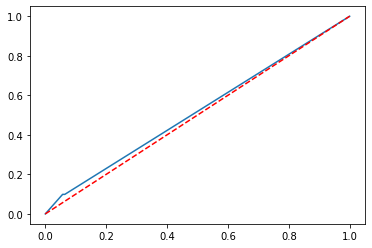

In [18]:
# 增加少样本权重，重新训练决策树
ratio = 6109/371
sample_weights = np.ones_like(Y_train, dtype=np.float)
sample_weights[Y_train==-1]=1
sample_weights[Y_train==1]=ratio

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_trian, Y_train, sample_weight=sample_weights)

y_pred = dt_clf.predict(X_val)
print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred, digits=5))

# auc
y_probas = dt_clf.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

print('auc:{}'.format(auc(fpr, tpr)))


![avator](img/bagging.png)

Confusion matrix:
[[1505   20]
 [  91    4]]
              precision    recall  f1-score   support

          -1       0.94      0.99      0.96      1525
           1       0.17      0.04      0.07        95

    accuracy                           0.93      1620
   macro avg       0.55      0.51      0.52      1620
weighted avg       0.90      0.93      0.91      1620

auc:0.6287316652286454


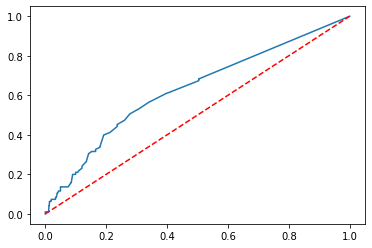

In [97]:
# 采用样本加权的随机森林

ratio = 6109/371
sample_weights = np.ones_like(Y_train, dtype=np.float)
sample_weights[Y_train==-1]=1
sample_weights[Y_train==1]=ratio

rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_trian, Y_train, sample_weight=sample_weights)

y_pred = rf_clf.predict(X_val)

print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
rf_report = classification_report(Y_val, y_pred)
print(rf_report)

# auc
y_probas = rf_clf.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

rf_auc=auc(fpr, tpr)
print('auc:{}'.format(rf_auc))

![avatar](img/boosting.png)

Confusion matrix:
[[1522    3]
 [  92    3]]
              precision    recall  f1-score   support

          -1    0.94300   0.99803   0.96974      1525
           1    0.50000   0.03158   0.05941        95

    accuracy                        0.94136      1620
   macro avg    0.72150   0.51481   0.51457      1620
weighted avg    0.91702   0.94136   0.91635      1620

auc:0.7261915444348577


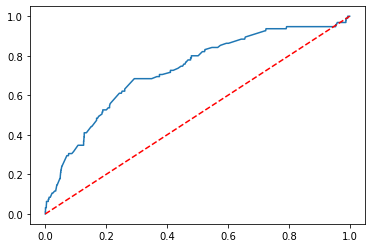

In [102]:
#使用adaboost方法 
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=175)
# 此处使用加权
# ada.fit(X_trian, Y_train, sample_weight= sample_weights)
ada.fit(X_trian, Y_train)
y_pred = ada.predict(X_val)

print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred, digits=5))

# auc
y_probas = ada.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

ada_auc=auc(fpr, tpr)
print('auc:{}'.format(ada_auc))
# 发现对少样本进行加权，会使得
# 少样本的召回率明显提高（0.99803-->0.6631），多样本的召回率会下降（0.0059-->0.7055)
# 少样本精度：0.5-->0.123； 多样本精度：0.943-->0.871
# auc也降低了：0.72619-->0.720
# 采用样本加权貌似没什么用，因为adaboost本身就会调节样本的权重


In [98]:
ada.feature_importances_

array([0.30857143, 0.29142857, 0.06285714, 0.09142857, 0.08      ,
       0.        , 0.02857143, 0.01142857, 0.12571429])

Confusion matrix:
[[1524    1]
 [  95    0]]
              precision    recall  f1-score   support

          -1    0.94132   0.99934   0.96947      1525
           1    0.00000   0.00000   0.00000        95

    accuracy                        0.94074      1620
   macro avg    0.47066   0.49967   0.48473      1620
weighted avg    0.88612   0.94074   0.91261      1620

auc:0.729318377911993


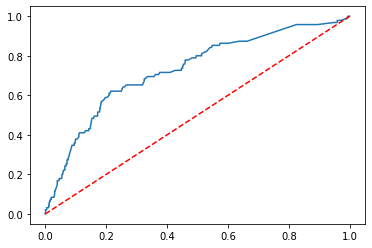

In [105]:
# 使用xgboost
from xgboost import XGBClassifier

xgb_cls = XGBClassifier()
xgb_cls.fit(X_trian, Y_train) 
y_pred = xgb_cls.predict(X_val)

print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred, digits=5))

# auc
y_probas = xgb_cls.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

xgb_auc=auc(fpr, tpr)
print('auc:{}'.format(xgb_auc))